In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import time
import gmaps
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns


In [2]:
# Census data files
census_state_path_2015 = "Output/2015_cleaned_all_county.csv"


In [3]:
# Read the Census data
census_state_results = pd.read_csv(census_state_path_2015)


In [4]:
census_state_results.head()

,Unnamed: 0,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,0,Alabama,Autauga,55221,26745,28476,1435,41857,10215,220,...,311,431,26,17653,5013,1319,0,7123,10271,4196
1,1,Alabama,Baldwin,195121,95314,99807,8780,162145,18536,1170,...,1203,3352,26,70051,10572,4985,343,26146,37463,14634
2,2,Alabama,Barbour,26932,14497,12435,1238,12442,12577,53,...,128,137,24,6172,1788,627,8,7190,12200,4740
3,3,Alabama,Bibb,22604,12073,10531,497,16839,4837,90,...,124,58,28,6369,1335,555,33,3797,6306,1876
4,4,Alabama,Blount,57710,28512,29198,4963,50727,865,173,...,88,510,34,18194,2995,931,88,9637,15697,4443


In [5]:
#Data Collection for Census data summary
total_pop = census_state_results["TotalPop"].sum()
men = census_state_results["Men"].sum()/total_pop * 100
women= census_state_results["Women"].sum()/total_pop * 100
employed_num = census_state_results["Employed"].sum()
employed = census_state_results["Employed"].sum()/total_pop * 100
income_avg = census_state_results["Income"].mean()
professional = census_state_results["Professional"].sum()/employed_num * 100
service = census_state_results["Service"].sum()/employed_num * 100
office = census_state_results["Office"].sum()/employed_num * 100
construction = census_state_results["Construction"].sum()/employed_num * 100
production = census_state_results["Production"].sum()/employed_num * 100
drive = census_state_results["Drive"].sum()/employed_num * 100
carpool = census_state_results["Carpool"].sum()/employed_num * 100
transit = census_state_results["Transit"].sum()/employed_num * 100
walk = census_state_results["Walk"].sum()/employed_num * 100
workathome = census_state_results["WorkatHome"].sum()/employed_num * 100
privatework = census_state_results["PrivateWork"].sum()/employed_num * 100
publicwork = census_state_results["PublicWork"].sum()/employed_num * 100
selfemployed = census_state_results["SelfEmployed"].sum()/employed_num * 100
familywork = census_state_results["FamilyWork"].sum()/employed_num * 100
poverty = census_state_results["Poverty"].sum()/employed_num * 100
childpoverty = census_state_results["ChildPoverty"].sum()/total_pop * 100
unemployment = census_state_results["Unemployment"].sum()/total_pop * 100

In [6]:
summary_2015_df = pd.DataFrame({"Total Pop": [total_pop],
                           "Men%": [men],
                           "Women%": [women],
                           "Income_Avg": [income_avg],
                           "Employed%": [employed],
                           "Professional%": [professional],
                           "Service%": [service],
                           "Office%": [office],
                           "Construction%": [construction],
                           "Production%": [production],
                           "Drive%": [drive],
                           "Carpool%": [carpool],
                           "Transit%": [transit],
                           "Walk%": [walk],
                           "WorkatHome%": [workathome],
                           "Privatework%": [privatework],
                           "Publicwork%": [publicwork],
                           "Selfemployed%": [selfemployed],
                           "Familywork%": [familywork],
                           "Poverty%": [poverty],
                           "Childpoverty%": [childpoverty],
                           "Selfemployed%": [selfemployed],
                           "Unemployment%": [unemployment]})           
                          
             
summary_2015_df .style.format({"Total Pop":"{:,}",
                         "Men%":"{:,.2f}%",
                         "Women%":"{:,.2f}%",
                         "Income_Avg":"${:,.2f}",
                         "Employed%":"{:,.2f}%",
                         "Professional%":"{:,.2f}%",
                         "Service%":"{:,.2f}%",
                         "Office%":"{:,.2f}%",
                         "Construction%":"{:,.2f}%",
                         "Production%":"{:,.2f}%",
                         "Drive%":"{:,.2f}%",
                         "Carpool%":"{:,.2f}%",
                         "Transit%":"{:,.2f}%",
                          "Walk%":"{:,.2f}%",
                          "WorkatHome%":"{:,.2f}%",
                          "Privatework%":"{:,.2f}%",
                          "Publicwork%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Familywork%":"{:,.2f}%",
                          "Poverty%":"{:,.2f}%",
                          "Childpoverty%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Unemployment%":"{:,.2f}%"})  

,Total Pop,Men%,Women%,Income_Avg,Employed%,Professional%,Service%,Office%,Construction%,Production%,Drive%,Carpool%,Transit%,Walk%,WorkatHome%,Privatework%,Publicwork%,Selfemployed%,Familywork%,Poverty%,Childpoverty%,Unemployment%
0,"320,098,094",49.19%,50.81%,"$46,115.54",45.86%,36.63%,18.16%,24.11%,8.95%,12.15%,76.42%,9.44%,5.13%,2.79%,4.40%,79.43%,14.36%,6.05%,0.16%,34.53%,22.04%,8.49%


In [7]:
# Building a dataframe to find the types that makes up the states workforce based on 2015:
sectors = census_state_results[['State', 'Income','TotalPop', 'Professional', 'Service', 'Office', 'Construction', 'Production']]
sectors

,State,Income,TotalPop,Professional,Service,Office,Construction,Production
0,Alabama,51281,55221,7963,4077,5804,2062,4101
1,Alabama,50254,195121,28450,15213,23293,9282,9626
2,Alabama,32964,26932,2303,1384,1985,928,1985
3,Alabama,38678,22604,1783,1484,1476,1575,1965
4,Alabama,45813,57710,6323,3128,5303,2995,4415
...,...,...,...,...,...,...,...,...
3215,Puerto Rico,16948,56858,4111,2950,3374,1256,1953
3216,Puerto Rico,18104,9130,526,1092,529,449,260
3217,Puerto Rico,17818,24685,1603,1426,1481,944,1338
3218,Puerto Rico,15627,36279,2093,2093,1673,1034,1188


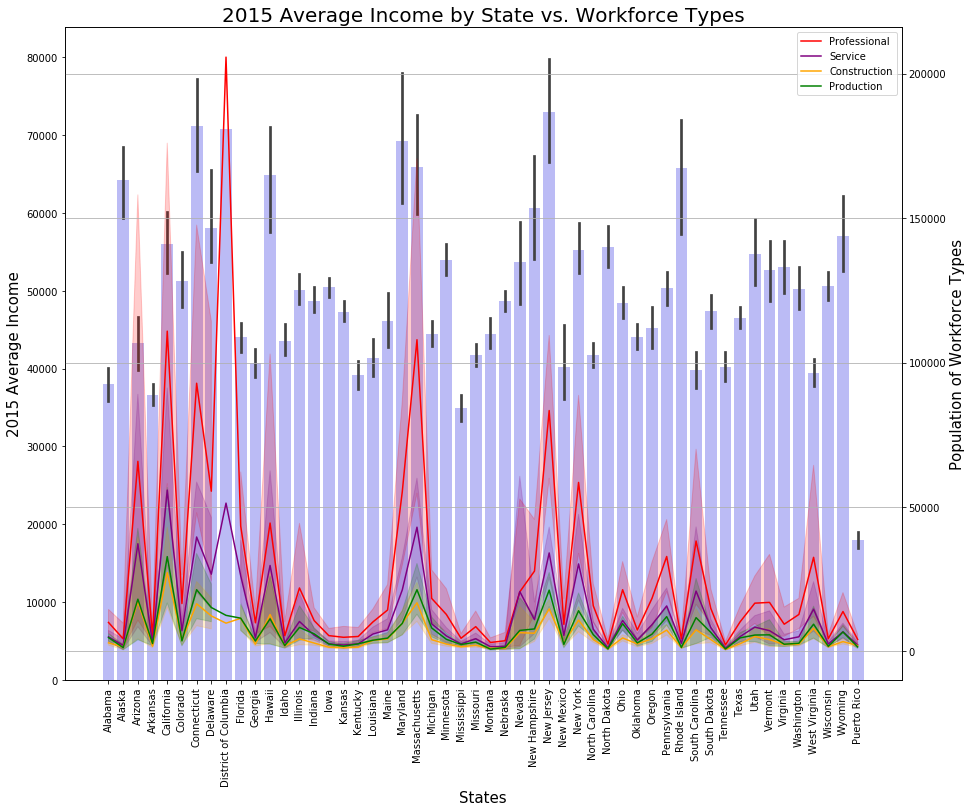

In [14]:
# Combo chart
fig, ax = plt.subplots(figsize=(15,12))
data = sectors

ax.set_title('2015 Average Income by State vs. Workforce Types', fontsize=20)
ax = sns.barplot(x='State', y='Income', data = data, color='blue', alpha=.30)

ax2 = ax.twinx()
color1 = 'red'
sns.lineplot(x='State', y='Professional', data = data, ax=ax2, color=color1,alpha=1.0)

color2 = 'purple'
sns.lineplot(x='State', y='Service', data = data, ax=ax2, color=color2,alpha=1.0)

color3 = 'orange'
sns.lineplot(x='State', y='Construction', data = data, ax=ax2, color=color3,alpha=1.0)

color4 = 'green'
sns.lineplot(x='State', y='Production', data = data, ax=ax2, color=color4,alpha=1.0)

ax.set_xlabel('States', fontsize=15)
ax.set_ylabel('2015 Average Income', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax2.set_ylabel('Population of Workforce Types', fontsize=15)
plt.legend(labels=['Professional', 'Service', 'Construction','Production'])
plt.grid()
plt.savefig("png_folder/2015 Average Income by State vs. Workforce Types.png")
plt.show()

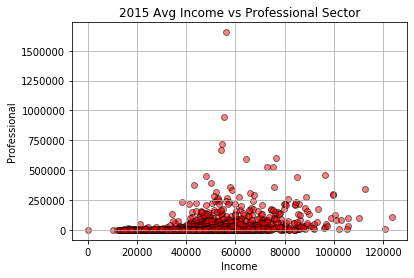

In [9]:
plt.scatter(census_state_results["Income"],census_state_results["Professional"], marker="o", facecolors="red", edgecolors="black",alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Professional")
plt.title(f"2015 Avg Income vs Professional Sector")
# plt.savefig("png_folder/2015 Avg Income vs. Professional Sector.png")
plt.grid()
plt.show()

The r-squared is: 0.08797845176788946


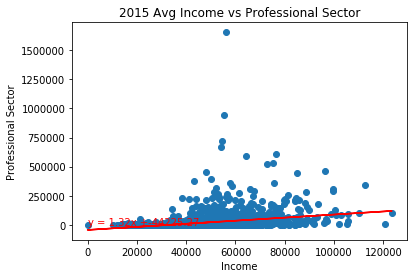

In [10]:
x_value = census_state_results["Income"]
y_value = census_state_results["Professional"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(5, 40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("2015 Avg Income vs Professional Sector")
plt.xlabel("Income")
plt.ylabel("Professional Sector")
# plt.savefig("png_folder/2015 Avg Income vs. Professional Sector Linear Regression.png")
plt.show()